In [1]:
import scda
import os
import sys
import shutil
import numpy as np

import matplotlib.pyplot as plt
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.linewidth'] = 1.
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['font.size'] = 11

import logging
scda.configure_log()
# The following two lines are a temporary fix for ipykernel's broken stderr output; 
# See https://github.com/ipython/ipykernel/issues/111
logger = logging.getLogger() 
logger.handlers[0].stream = sys.stdout

print("Imported scda module from {0:s}".format(os.path.abspath(scda.__file__)))

Populating the interactive namespace from numpy and matplotlib
Imported scda module from /Users/ntz/SCDA/scda_pytools/scda.py


## Set the design parameters

In [2]:
hex3_N125g2r = {'N': 125, 'prim':'hex3', 'centobs':True, 'secobs':'X', 'thick':'025', 'gap':2, 'edge':'round'}
hex3_N250g1r = {'N': 250, 'prim':'hex3', 'centobs':True, 'secobs':'X', 'thick':'025', 'gap':1, 'edge':'round'}
fpm_90deg_H = {'R0': 4., 'R1': 10., 'openang':90, 'orient':'H', 'fpmres': 10}
fpm_90deg_V = {'R0': 4., 'R1': 10., 'openang':90, 'orient':'V', 'fpmres': 10}
fpm_180deg_H = {'R0': 4., 'R1': 10., 'openang':180, 'fpmres': 10}

ls_N050_od75 = {'N': 50, 'obscure':0, 'id':20, 'od':75}
ls_N050_od80 = {'N': 50, 'obscure':0, 'id':20, 'od':80}

image_params = {'c': 10., 'dR':-0.5, 'bw':0.10, 'Nlam':3}
image_params_mono = {'c': 10., 'dR':-0.5, 'bw':0.00, 'Nlam':1}

In [3]:
#input_dir = os.path.expanduser("~/Box Sync/scda/InputMasks")
#work_dir = os.path.expanduser("~/Box Sync/scda/scda_qpsplc_tests/")
input_dir = "/astro/opticslab1/SCDA/Apertures/InputMasks_v4" # location of input TelAp, FPM, and LS arrays
work_dir = "/astro/opticslab1/SCDA/Scripts/AMPL/qpsplc_june/"
if not os.path.exists(os.path.normpath(work_dir)):
    os.mkdir(work_dir)
TelAp_dir = os.path.join(input_dir, "TelAp")
FPM_dir = os.path.join(input_dir, "FPM")
LS_dir = os.path.join(input_dir, "LS")

In [4]:
design_params_N125g2r_fpmH90_LSod75 = {'Pupil': hex3_N125g2r, 'FPM': fpm_90deg_H,
                                       'LS': ls_N050_od75, 'Image': image_params}
design_params_N125g2r_fpmH90_LSod80 = {'Pupil': hex3_N125g2r, 'FPM': fpm_90deg_H,
                                       'LS': ls_N050_od80, 'Image': image_params}
#design_params_N125g2r_fpmV90 = {'Pupil': hex3_N125g2r, 'FPM': fpm_90deg_V,
#                             'LS': ls_N050_od80, 'Image': image_params}
#design_params_N125g2r_fpmH90_mono = {'Pupil': hex3_N125g2r, 'FPM': fpm_90deg_H,
#                                  'LS': ls_N050_od80, 'Image': image_params_mono}
#design_params_N125g2r_fpmV90_mono = {'Pupil': hex3_N125g2r, 'FPM': fpm_90deg_V,
#                                  'LS': ls_N050_od80, 'Image': image_params_mono}

design_params_N250g1r_fpmH90_LSod75 = {'Pupil': hex3_N250g1r, 'FPM': fpm_90deg_H,
                                       'LS': ls_N050_od75, 'Image': image_params}
design_params_N250g1r_fpmH90_LSod80 = {'Pupil': hex3_N250g1r, 'FPM': fpm_90deg_H,
                                       'LS': ls_N050_od80, 'Image': image_params}

design_params_N125g2r_fpmH180_LSod75 = {'Pupil': hex3_N125g2r, 'FPM': fpm_180deg_H,
                                        'LS': ls_N050_od75, 'Image': image_params}
design_params_N125g2r_fpmH180_LSod80 = {'Pupil': hex3_N125g2r, 'FPM': fpm_180deg_H,
                                        'LS': ls_N050_od80, 'Image': image_params}
design_params_N250g1r_fpmH180_LSod75 = {'Pupil': hex3_N250g1r, 'FPM': fpm_180deg_H,
                                        'LS': ls_N050_od75, 'Image': image_params}
design_params_N250g1r_fpmH180_LSod80 = {'Pupil': hex3_N250g1r, 'FPM': fpm_180deg_H,
                                        'LS': ls_N050_od80, 'Image': image_params}

fileorg = {'work dir': work_dir, 'TelAp dir': TelAp_dir,
           'FPM dir': FPM_dir, 'LS dir': LS_dir}
dualsimp = {'method': 'dualsimp'}
bar = {'method': 'bar'}
barhompre0 = {'method': 'barhom', 'presolve': False}
barhom = {'method': 'barhom', 'presolve': True}
barhomconvtol = {'method': 'barhom', 'convtol':9.}

## Initiate the coronagraph objects

In [5]:
hex3_splc_N125g2r_H90_od80 = scda.QuarterplaneSPLC(design=design_params_N125g2r_fpmH90_LSod80, fileorg=fileorg, solver=dualsimp)

hex3_splc_N250g1r_H90_od75 = scda.QuarterplaneSPLC(design=design_params_N250g1r_fpmH90_LSod75, fileorg=fileorg, solver=dualsimp)
hex3_splc_N250g1r_H90_od80 = scda.QuarterplaneSPLC(design=design_params_N250g1r_fpmH90_LSod80, fileorg=fileorg, solver=dualsimp)

hex3_splc_N125g2r_H180_od75 = scda.QuarterplaneSPLC(design=design_params_N125g2r_fpmH180_LSod75, fileorg=fileorg, solver=dualsimp)
hex3_splc_N125g2r_H180_od80 = scda.QuarterplaneSPLC(design=design_params_N125g2r_fpmH180_LSod80, fileorg=fileorg, solver=dualsimp)
hex3_splc_N250g1r_H180_od75 = scda.QuarterplaneSPLC(design=design_params_N250g1r_fpmH180_LSod75, fileorg=fileorg, solver=dualsimp)
hex3_splc_N250g1r_H180_od80 = scda.QuarterplaneSPLC(design=design_params_N250g1r_fpmH180_LSod80, fileorg=fileorg, solver=dualsimp)

#hex3_splc_N125_H90_pre0 = scda.QuarterplaneSPLC(design=design_params_N125_fpmH90, fileorg=fileorg, solver=barhompre0)
#hex3_splc_N125_H90_pre1 = scda.QuarterplaneSPLC(design=design_params_N125_fpmH90, fileorg=fileorg, solver=barhom)
#hex3_splc_N125_V90_pre0 = scda.QuarterplaneSPLC(design=design_params_N125_fpmV90, fileorg=fileorg, solver=barhompre0)
#hex3_splc_N125_H90_pre0_mono = scda.QuarterplaneSPLC(design=design_params_N125_fpmH90_mono, fileorg=fileorg, solver=barhompre0)
#hex3_splc_N125_H90_pre1_mono = scda.QuarterplaneSPLC(design=design_params_N125_fpmH90_mono, fileorg=fileorg, solver=barhom)
#hex3_splc_N125_V90_pre0_mono = scda.QuarterplaneSPLC(design=design_params_N125_fpmV90_mono, fileorg=fileorg, solver=barhompre0)

#hexap_splc_N250_pre0 = scda.QuarterplaneSPLC(design=design_params_N250, fileorg=fileorg, solver=barhompre0)
#hexap_splc_N250_pre1 = scda.QuarterplaneSPLC(design=design_params_N250, fileorg=fileorg, solver=barhom)
#hexap_splc_N250_pre0_mono = scda.QuarterplaneSPLC(design=design_params_N250_mono, fileorg=fileorg, solver=barhompre0)

In [ ]:
hex3_splc_N125g2r_H90.check_ampl_input_files()

In [ ]:
hex3_splc_N250g1r_H90_od75.check_ampl_input_files()

In [ ]:
hex3_splc_N250g1r_H180_od75.check_ampl_input_files()

In [ ]:
hex3_splc_N125g2r_H90_od80.write_ampl(overwrite=True)
hex3_splc_N250g1r_H90_od75.write_ampl(overwrite=True)
hex3_splc_N250g1r_H90_od80.write_ampl(overwrite=True)

hex3_splc_N125g2r_H180_od75.write_ampl(overwrite=True)
hex3_splc_N125g2r_H180_od80.write_ampl(overwrite=True)
hex3_splc_N250g1r_H180_od75.write_ampl(overwrite=True)
hex3_splc_N250g1r_H180_od80.write_ampl(overwrite=True)

In [ ]:
os.listdir(os.path.join(input_dir,'FPM'))

In [ ]:
bundled_dir = os.path.expanduser("~/Box Sync/scda/qpsplc_june/qpsplc_june_t2/")
bundled_coron_list = scda.make_ampl_bundle([hex3_splc_N250g1r_H90_od75, hex3_splc_N250g1r_H90_od80,
                                            hex3_splc_N125g2r_H180_od75, hex3_splc_N125g2r_H180_od80,
                                            hex3_splc_N250g1r_H180_od75, hex3_splc_N250g1r_H180_od80],
                                           bundled_dir, queue_spec='12h',
                                           email=None, arch=None)
os.listdir(bundled_dir)

In [6]:
test_coron = hex3_splc_N250g1r_H90_od80
#test_coron = hex3_splc_N125_H90_pre1

In [7]:
test_coron.get_metrics()

Non-binary residuals, as a percentage of clear telescope aperture area: 0.04%
Band-averaged Airy throughput: 14.54%
Band-averaged relative Airy throughput: 34.13%
Band-averaged FWHM PSF area / (lambda0/D)^2: 1.41


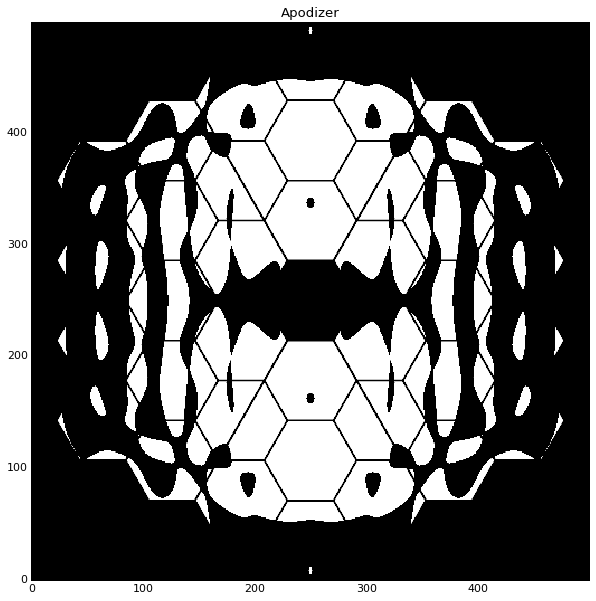

In [8]:
TelAp_qp = np.loadtxt(test_coron.fileorg['TelAp fname'])
TelAp = np.concatenate((np.concatenate((TelAp_qp[::-1,::-1], TelAp_qp[:,::-1]),axis=0),
                        np.concatenate((TelAp_qp[::-1,:], TelAp_qp),axis=0)), axis=1)

A_col = np.loadtxt(test_coron.fileorg['sol fname'])[:,-1]
A_qp = A_col.reshape(TelAp_qp.shape)
A = np.concatenate((np.concatenate((A_qp[::-1,::-1], A_qp[:,::-1]),axis=0),
                    np.concatenate((A_qp[::-1,:], A_qp),axis=0)), axis=1)

plt.figure(figsize=(10,10))
plt.imshow(A*TelAp)
plt.title('Apodizer')

In [9]:
Nlam = 5
intens_polychrom, seps, radial_intens_polychrom, ang_mask = test_coron.get_onax_psf(Nlam=Nlam)

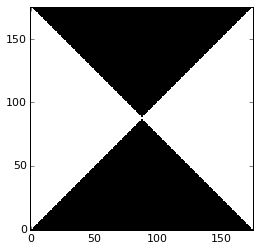

In [10]:
plt.imshow(ang_mask)

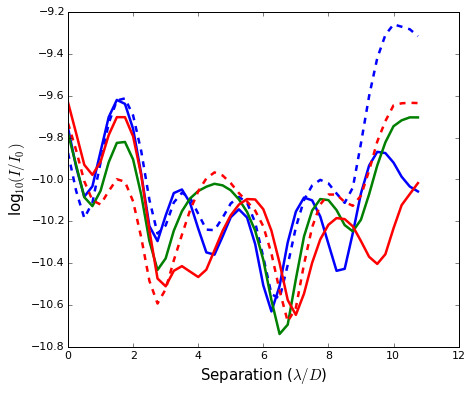

In [11]:
plt.figure(figsize=(7,6))
plt.plot(seps,np.log10(radial_intens_polychrom[0]),'b')
plt.plot(seps,np.log10(radial_intens_polychrom[Nlam/2-1]),'b--')
plt.plot(seps,np.log10(radial_intens_polychrom[Nlam/2]),'g')
plt.plot(seps,np.log10(radial_intens_polychrom[Nlam-2]),'r--')
plt.plot(seps,np.log10(radial_intens_polychrom[Nlam-1]),'r')
#plt.legend([r'$\lambda$ min',r'$\lambda$ cent','$\lambda$ max'],loc='upper left')
plt.ylabel(r'log$_{10}(I/I_0)$',fontsize=15)
plt.xlabel(r'Separation ($\lambda/D$)',fontsize=15)

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(np.log10(intens_polychrom[0]), cmap='CMRmap',vmin=-12,vmax=-7)
plt.colorbar()
p=plt.axis('off')